In [41]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Definir parâmetros
# =========================
context_length = 256  # históricos para o modelo
horizon = 24          # passos a prever
N = context_length + horizon  # total da série

model_path = "moe_model.pt"
device = "cpu"

# =========================
# 2. Criar série sintética 
# =========================
t = np.arange(N)
series = np.sin(2 * np.pi * t / 50) + 0.1 * np.random.randn(N)

In [ ]:
# =========================
# 2. Predizer via subprocess
# =========================
from setup.models.configuration_model import predict_from_model

preds = predict_from_model(model_path=model_path, series=series[:-horizon], context_length=context_length, device=device)
print(preds)

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 133576.56it/s]


Amostra 0: Selecionados -> timesfm: 0.558, timemoe: 0.442; Não selecionados -> moirai: 0.294
tensor([[ 6.8009e-01,  7.6155e-01,  8.4604e-01,  9.2240e-01,  9.8795e-01,
          1.0437e+00,  1.0881e+00,  1.1177e+00,  1.1169e+00,  1.1085e+00,
          1.0777e+00,  1.0381e+00,  9.9040e-01,  9.2859e-01,  8.4813e-01,
          7.4695e-01,  6.2760e-01,  5.1184e-01,  3.8595e-01,  2.5848e-01,
          1.2655e-01,  4.4688e-04, -1.3325e-01, -2.6296e-01]])


In [43]:
# =========================
# 3. Converter saída em array
# =========================
pred_list = preds.squeeze(0).tolist()
pred_array = np.array(pred_list)

In [44]:
pred_array

array([ 6.80091202e-01,  7.61546969e-01,  8.46040368e-01,  9.22400951e-01,
        9.87945080e-01,  1.04373193e+00,  1.08812869e+00,  1.11769223e+00,
        1.11690056e+00,  1.10846472e+00,  1.07768536e+00,  1.03809285e+00,
        9.90400195e-01,  9.28588569e-01,  8.48125100e-01,  7.46949077e-01,
        6.27602458e-01,  5.11839271e-01,  3.85950685e-01,  2.58475453e-01,
        1.26549572e-01,  4.46878374e-04, -1.33254558e-01, -2.62962580e-01])

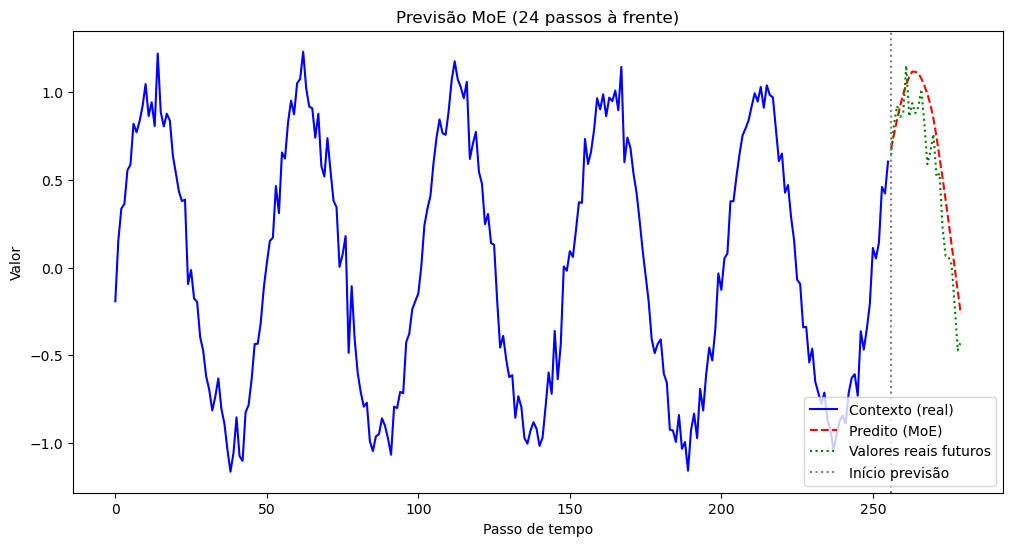

In [45]:
# =========================
# 4. Plotar
# =========================
context = series[:context_length]
future_real = series[context_length:] 

time_axis_context = range(context_length)
time_axis_pred = range(context_length, context_length + horizon)
time_axis_real = range(context_length, context_length + horizon)

plt.figure(figsize=(12,6))
plt.plot(time_axis_context, context, label="Contexto (real)", color="blue")
plt.plot(time_axis_pred, pred_array, label="Predito (MoE)", color="red", linestyle="--")
plt.plot(time_axis_real, future_real, label="Valores reais futuros", color="green", linestyle=":")

plt.axvline(context_length, color="gray", linestyle=":", label="Início previsão")
plt.legend()
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.title(f"Previsão MoE ({horizon} passos à frente)")
plt.show()